<a href="https://colab.research.google.com/github/Rakhshindaa/Internship_tasks/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
dataset = pd.read_csv('ratings.csv')
movie_title = pd.read_csv('movies.csv')

In [ ]:
# sample of data
print('dataset:')
print(dataset.head(2))
print('titles:')
print(movie_title.head(2))

dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
titles:
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy


In [ ]:
# combine of data by item id
data = pd.merge(dataset,movie_title , on = 'movieId')
# sample of data
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
titles:
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy
Total number of users: 610
Total Number of Unique Movies: 9719
highest rating = 5.0 , lowest rating = 0.5
The total number of movies in each rating:
Movie recommendations for those who liked Toy Story


NameError: name 'recommended' is not defined

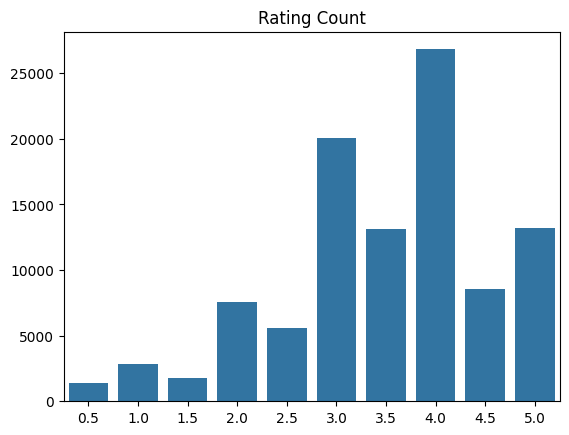

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import linear_kernel
dataset = pd.read_csv('ratings.csv')
movie_title = pd.read_csv('movies.csv')
# sample of data
print('dataset:')
print(dataset.head(2))
print('titles:')
print(movie_title.head(2))
# combine of data by item id
data = pd.merge(dataset,movie_title , on = 'movieId')
# sample of data
data.head()
# how many users in system
print("Total number of users:",len(data['userId'].value_counts()))
# how many movies in system
print("Total Number of Unique Movies:",len(data['title'].unique()))
# rating range
max = data['rating'].max()
min = data['rating'].min()
print(f'highest rating = {max} , lowest rating = {min}')
data_rating = dict(data['rating'].value_counts())
print("The total number of movies in each rating:")
data_rating
plt.title('Rating Count')
sns.barplot(x = list(data_rating.keys()), y = list(data_rating.values()))
movie_rate = data.pivot_table(index = 'userId' ,columns = 'title' , values ='rating')
movie_rate.fillna(0 , inplace = True)
movie_rate.head()
df = pd.DataFrame()
df['count_rating'] = pd.DataFrame(data.groupby('title')['rating'].count())
df.head()
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title , min_rating_count = 50):
  # to calculate the
    user_rating = movie_rate[title]
    similar_movies = movie_rate.corrwith(user_rating)
    corr_movies = pd.DataFrame(similar_movies , columns = ['correlations'])
    corr_movies.dropna(inplace = True)
    corr_movies = corr_movies.join(df['count_rating'], how='left', lsuffix='_left', rsuffix='_right')
    final = corr_movies[corr_movies['count_rating'] > min_rating_count].sort_values('correlations' , ascending = False)
    return final
    recommended = get_recommendations('Toy Story (1995)')
print("Movie recommendations for those who liked Toy Story")
recommended.head(10)
plt.title('Best 10 Movies For Toy Story')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])
recommended = get_recommendations('Ace Ventura: When Nature Calls (1995)')
recommended.head(10)
plt.title('Best 10 Movies For Ace Ventura: When Nature Calls (1995')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])
recommended = get_recommendations('Avengers, The (1998)')
recommended.head(10)
plt.title('Best 10 Movies For Avengers, The (1998')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])
print("***** WELCOME TO OUR MOVIE RECOMMENDER SYSTEM *****")
print("OPTIONS AVAILABLE:")
print("1. Get recommendation for a movie")
print("2. Exit")
flag=True
while flag==True:
    choice=int(input("Enter your choice: "))
    if choice==1:
      movie_name=input("Enter the movie name: ")
      recommended = get_recommendations(movie_name)
      print("Movie recommendations for those who liked",movie_name)
      print(recommended.head(10))
    if choice==2:
      flag=False
      print("Thank you for using our movie recommender system")


In [ ]:
# how many users in system
print("Total number of users:",len(data['userId'].value_counts()))

Total number of users: 610


In [ ]:
# how many movies in system
print("Total Number of Unique Movies:",len(data['title'].unique()))

Total Number of Unique Movies: 9719


In [ ]:
# rating range
max = data['rating'].max()
min = data['rating'].min()
print(f'highest rating = {max} , lowest rating = {min}')

highest rating = 5.0 , lowest rating = 0.5


In [ ]:
data_rating = dict(data['rating'].value_counts())
print("The total number of movies in each rating:")
data_rating

The total number of movies in each rating:


{4.0: 26818,
 3.0: 20047,
 5.0: 13211,
 3.5: 13136,
 4.5: 8551,
 2.0: 7551,
 2.5: 5550,
 1.0: 2811,
 1.5: 1791,
 0.5: 1370}

<Axes: title={'center': 'Rating Count'}>

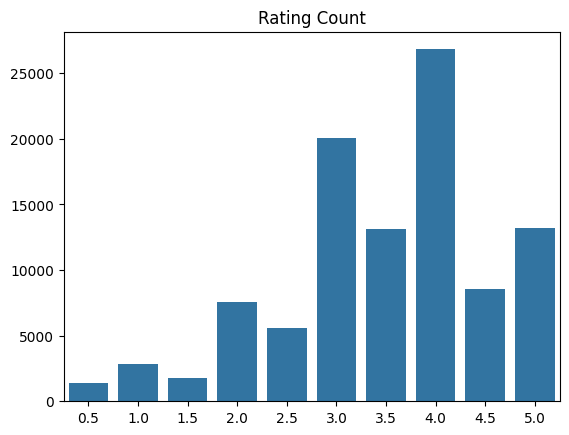

In [ ]:
plt.title('Rating Count')
sns.barplot(x = list(data_rating.keys()), y = list(data_rating.values()))

In [ ]:
movie_rate = data.pivot_table(index = 'userId' ,columns = 'title' , values ='rating')
movie_rate.fillna(0 , inplace = True)
movie_rate.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.DataFrame()
df['count_rating'] = pd.DataFrame(data.groupby('title')['rating'].count())
df.head()

,count_rating
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2


In [ ]:
# # Function that takes in movie title as input and outputs most similar movies
# def get_recommendations(title , min_rating_count = 50):
#   # to calculate the
#     user_rating = movie_rate[title]
#     similar_movies = movie_rate.corrwith(user_rating)
#     corr_movies = pd.DataFrame(similar_movies , columns = ['correlations'])
#     corr_movies.dropna(inplace = True)
#     corr_movies = corr_movies.join(df['count_rating'], how='left', lsuffix='_left', rsuffix='_right')
#     final = corr_movies[corr_movies['count_rating'] > min_rating_count].sort_values('correlations' , ascending = False)
#     return final
def get_recommendations(title, min_rating_count=50):
    # to calculate the
    # Strip leading/trailing whitespace from title before using it as a key
    title = title.strip()
    user_rating = movie_rate[title]
    similar_movies = movie_rate.corrwith(user_rating)
    corr_movies = pd.DataFrame(similar_movies, columns=['correlations'])
    corr_movies.dropna(inplace=True)
    corr_movies = corr_movies.join(movie_rate['count_rating'])
    recommendations = corr_movies[corr_movies['count_rating'] > min_rating_count].sort_values('correlations', ascending=False)
    recommendations = recommendations.reset_index().rename(columns={'index': 'title'})
    return recommendations[['title', 'correlations', 'count_rating']]

In [ ]:
# recommended = get_recommendations('Toy Story (1995)')
# print("Movie recommendations for those who liked Toy Story")
# recommended.head(10)
recommended = get_recommendations('Toy Story (1995)')  # Assign the result here
print("Movie recommendations for those who liked Toy Story")
recommended.head(10)

Movie recommendations for those who liked Toy Story


,correlations,count_rating
title,,
Toy Story (1995),1.000000,215
Toy Story 2 (1999),0.461761,97
Groundhog Day (1993),0.361540,143
Independence Day (a.k.a. ID4) (1996),0.358473,202
Willy Wonka & the Chocolate Factory (1971),0.357314,119
Mission: Impossible (1996),0.352847,162
"Nutty Professor, The (1996)",0.350295,82
"Bug's Life, A (1998)",0.345431,92
"Lion King, The (1994)",0.344248,172


<Axes: title={'center': 'Best 10 Movies For Toy Story'}>

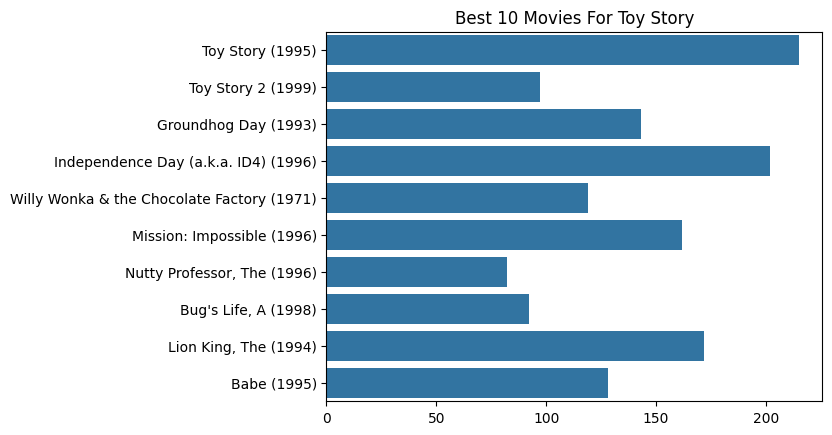

In [ ]:
plt.title('Best 10 Movies For Toy Story')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])

In [ ]:
recommended = get_recommendations('Ace Ventura: When Nature Calls (1995)')
recommended.head(10)

,correlations,count_rating
title,,
Ace Ventura: When Nature Calls (1995),1.000000,88
Ace Ventura: Pet Detective (1994),0.529725,161
"Mask, The (1994)",0.418776,157
Dumb & Dumber (Dumb and Dumber) (1994),0.413605,133
Jumanji (1995),0.412808,110
"Nightmare Before Christmas, The (1993)",0.388954,93
Happy Gilmore (1996),0.382254,99
Mrs. Doubtfire (1993),0.379447,144
Interview with the Vampire: The Vampire Chronicles (1994),0.378959,109


<Axes: title={'center': 'Best 10 Movies For Ace Ventura: When Nature Calls (1995'}>

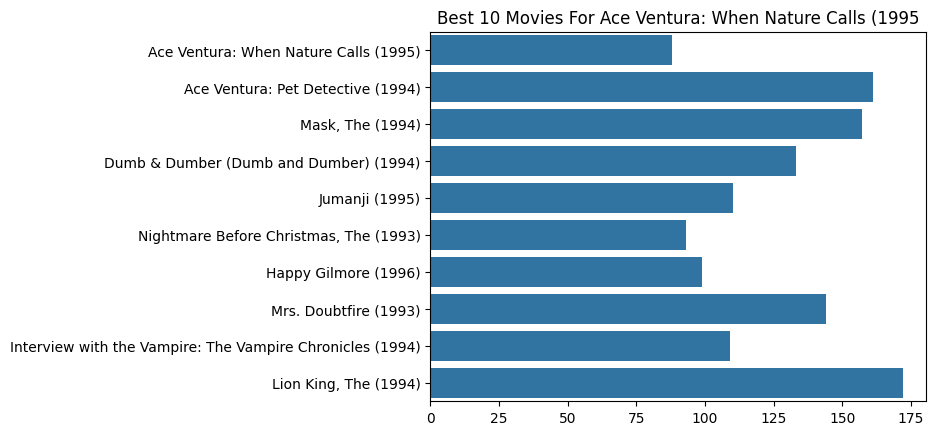

In [ ]:
plt.title('Best 10 Movies For Ace Ventura: When Nature Calls (1995')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])

In [ ]:
recommended = get_recommendations('Avengers, The (1998)')
recommended.head(10)

,correlations,count_rating
title,,
Batman Returns (1992),0.343087,60
Con Air (1997),0.303365,59
"Mummy, The (1999)",0.289296,87
Blade (1998),0.267875,58
Beetlejuice (1988),0.253760,91
Hook (1991),0.253344,53
The Devil's Advocate (1997),0.246592,51
Dragonheart (1996),0.244112,65
Judge Dredd (1995),0.244107,62


<Axes: title={'center': 'Best 10 Movies For Avengers, The (1998'}>

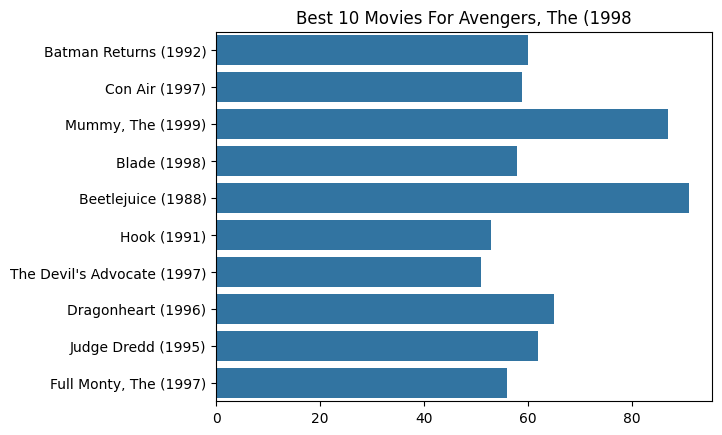

In [ ]:
plt.title('Best 10 Movies For Avengers, The (1998')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])

In [ ]:
print("***** WELCOME TO OUR MOVIE RECOMMENDER SYSTEM *****")
print("OPTIONS AVAILABLE:")
print("1. Get recommendation for a movie")
print("2. Exit")
flag=True
# while flag==True:
#     choice=int(input("Enter your choice: "))
#     if choice==1:
#       movie_name=input("Enter the movie name: ")
#       recommended = get_recommendations(movie_name)
#       print("Movie recommendations for those who liked",movie_name)
#       print(recommended.head(10))
#     if choice==2:
#       flag=False
#       print("Thank you for using our movie recommender system")
while flag == True:
    choice = int(input("Enter your choice: "))
    if choice == 1:
        movie_name = input("Enter the movie name: ")
        recommended = get_recommendations(movie_name)  # Assign the result here
        print("Movie recommendations for those who liked", movie_name)
        print(recommended.head(10))
    if choice == 2:
        flag = False
        print("Thank you for using our movie recommender system")

***** WELCOME TO OUR MOVIE RECOMMENDER SYSTEM *****
OPTIONS AVAILABLE:
1. Get recommendation for a movie
2. Exit
Enter your choice: 1
Enter the movie name: ToyStory


KeyError: 'ToyStory'

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import linear_kernel

# ... (rest of your code) ...

# Call get_recommendations and assign the result to recommended before using it
recommended = get_recommendations('Toy Story (1995)')  # Assign the result here
print("Movie recommendations for those who liked Toy Story")
recommended.head(10)  # Now recommended is defined in this scope

# ... (rest of your code) ...

# In the while loop, assign the result of get_recommendations to recommended
while flag == True:
    choice = int(input("Enter your choice: "))
    if choice == 1:
        movie_name = input("Enter the movie name: ")
        recommended = get_recommendations(movie_name)  # Assign the result here
        print("Movie recommendations for those who liked", movie_name)
        print(recommended.head(10))
    if choice == 2:
        flag = False
        print("Thank you for using our movie recommender system")

KeyError: 'count_rating'

Total number of users: 610
Total number of unique movies: 9719
Highest rating = 5.0, Lowest rating = 0.5


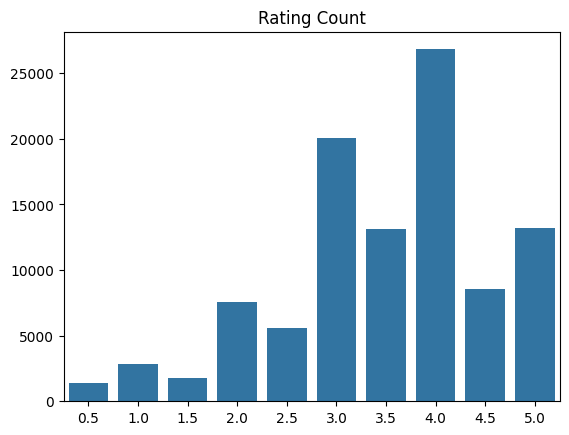

***** WELCOME TO OUR MOVIE RECOMMENDER SYSTEM *****
OPTIONS AVAILABLE:
1. Get recommendation for a movie
2. Exit
Movie recommendations for those who liked 'Toy Story (1995)':
                                            correlations  count_rating
title                                                                 
Toy Story (1995)                                1.000000           215
Toy Story 2 (1999)                              0.461761            97
Groundhog Day (1993)                            0.361540           143
Independence Day (a.k.a. ID4) (1996)            0.358473           202
Willy Wonka & the Chocolate Factory (1971)      0.357314           119
Mission: Impossible (1996)                      0.352847           162
Nutty Professor, The (1996)                     0.350295            82
Bug's Life, A (1998)                            0.345431            92
Lion King, The (1994)                           0.344248           172
Babe (1995)                                 

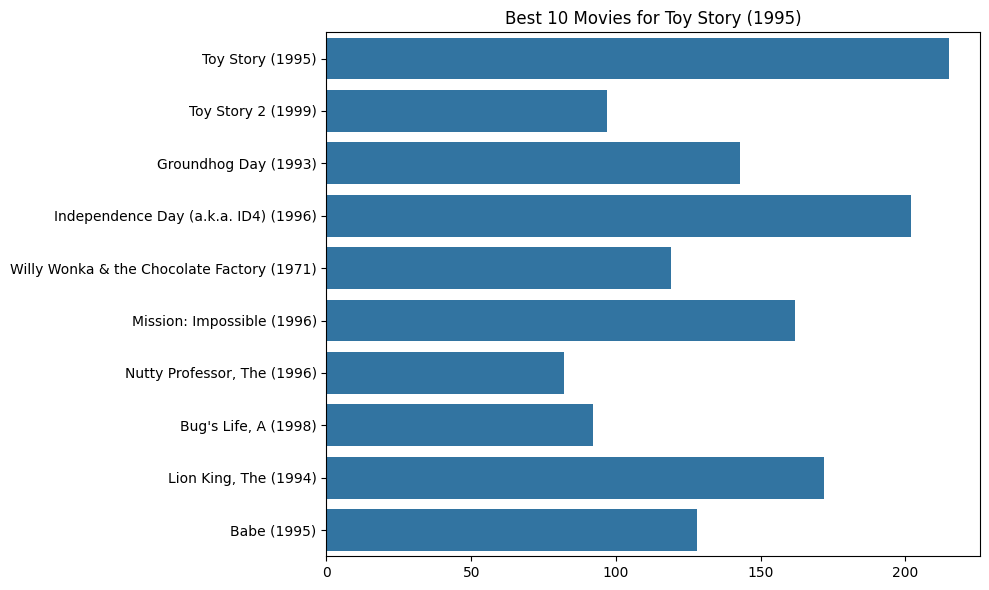

Movie recommendations for those who liked 'Ace Ventura: When Nature Calls (1995)':
                                                    correlations  count_rating
title                                                                         
Ace Ventura: When Nature Calls (1995)                   1.000000            88
Ace Ventura: Pet Detective (1994)                       0.529725           161
Mask, The (1994)                                        0.418776           157
Dumb & Dumber (Dumb and Dumber) (1994)                  0.413605           133
Jumanji (1995)                                          0.412808           110
Nightmare Before Christmas, The (1993)                  0.388954            93
Happy Gilmore (1996)                                    0.382254            99
Mrs. Doubtfire (1993)                                   0.379447           144
Interview with the Vampire: The Vampire Chronic...      0.378959           109
Lion King, The (1994)                           

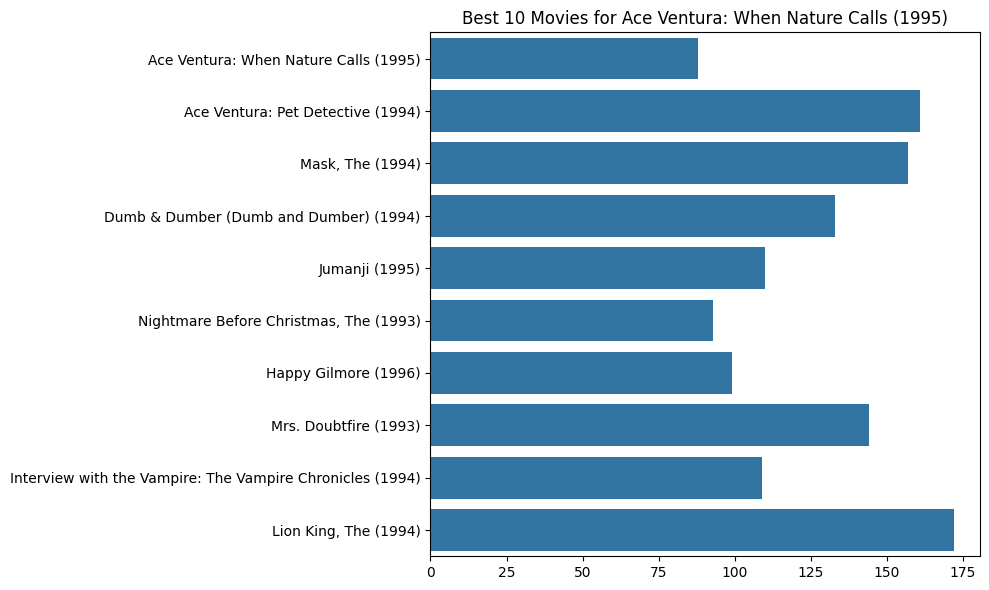

Please enter a valid number (1 or 2).


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import linear_kernel

# Load datasets
dataset = pd.read_csv('ratings.csv')
movie_title = pd.read_csv('movies.csv')

# Combine data by movieId
data = pd.merge(dataset, movie_title, on='movieId')

# Data summary
print('Total number of users:', len(data['userId'].value_counts()))
print('Total number of unique movies:', len(data['title'].unique()))

# Ratings range
max_rating = data['rating'].max()
min_rating = data['rating'].min()
print(f'Highest rating = {max_rating}, Lowest rating = {min_rating}')

# Plot ratings distribution
data_rating = dict(data['rating'].value_counts())
plt.title('Rating Count')
sns.barplot(x=list(data_rating.keys()), y=list(data_rating.values()))
plt.show()

# Create movie rating pivot table (users as rows, movies as columns)
movie_rate = data.pivot_table(index='userId', columns='title', values='rating')
movie_rate.fillna(0, inplace=True)

# DataFrame showing count of ratings per movie
df = pd.DataFrame()
df['count_rating'] = pd.DataFrame(data.groupby('title')['rating'].count())

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, min_rating_count=50):
    if title not in movie_rate.columns:
        print(f"Movie '{title}' not found in the dataset.")
        return None

    # Correlation with the input movie
    user_rating = movie_rate[title]
    similar_movies = movie_rate.corrwith(user_rating)
    corr_movies = pd.DataFrame(similar_movies, columns=['correlations'])
    corr_movies.dropna(inplace=True)

    # Merge correlation and count_rating
    corr_movies = corr_movies.join(df['count_rating'], how='left')
    final = corr_movies[corr_movies['count_rating'] > min_rating_count].sort_values('correlations', ascending=False)

    return final

# Display recommendations and plot top 10 movies
def show_recommendations(movie_name):
    recommendations = get_recommendations(movie_name)
    if recommendations is not None:
        print(f"Movie recommendations for those who liked '{movie_name}':")
        print(recommendations.head(10))

        plt.figure(figsize=(10,6))
        sns.barplot(y=list(recommendations.index)[:10], x=list(recommendations['count_rating'])[:10])
        plt.title(f'Best 10 Movies for {movie_name}')
        plt.tight_layout()
        plt.show()

# Interactive part
print("***** WELCOME TO OUR MOVIE RECOMMENDER SYSTEM *****")
print("OPTIONS AVAILABLE:")
print("1. Get recommendation for a movie")
print("2. Exit")

flag = True
while flag:
    try:
        choice = int(input("Enter your choice (1 or 2): "))
        if choice == 1:
            movie_name = input("Enter the movie name: ")
            show_recommendations(movie_name)
        elif choice == 2:
            flag = False
            print("Thank you for using our movie recommender system!")
        else:
            print("Invalid choice! Please enter 1 or 2.")
    except ValueError:
        print("Please enter a valid number (1 or 2).")
